![img](facial.jpg)

## Reconocimiento Facial

Practica de uso de SVC en un ejercicio de reconocimiento facial, utilizando un dataset existente en Sklearn

In [46]:
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [2]:
faces = fetch_lfw_people(min_faces_per_person = 60)

In [5]:
# Personas de las imagenes
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

De forma anticipada, veremos la cantidad de registros por persona dentro del dataset

<BarContainer object of 8 artists>

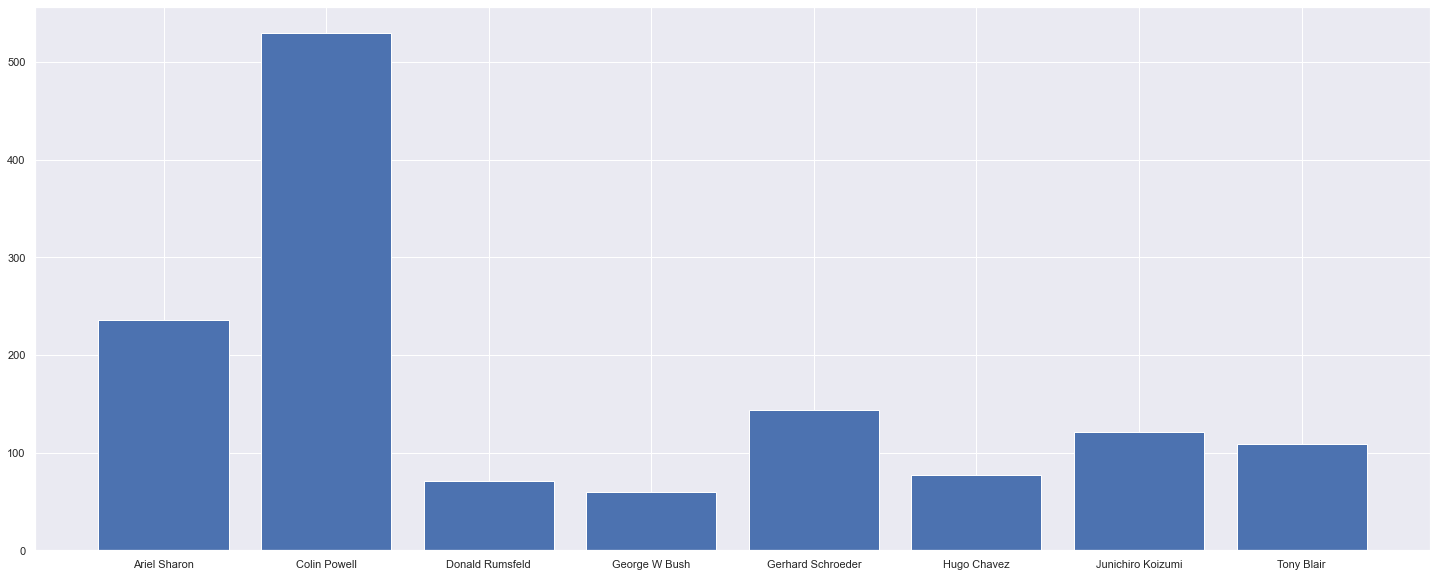

In [54]:
fig = plt.figure(figsize = (25, 10))

plt.bar(
    x = faces.target_names,
    height = collections.Counter(faces.target).values())


Este desbalance de los datos podria generar problemas para la clasficicación

In [6]:
# Catidad de imagenes por persona
faces.images.shape

(1348, 62, 47)

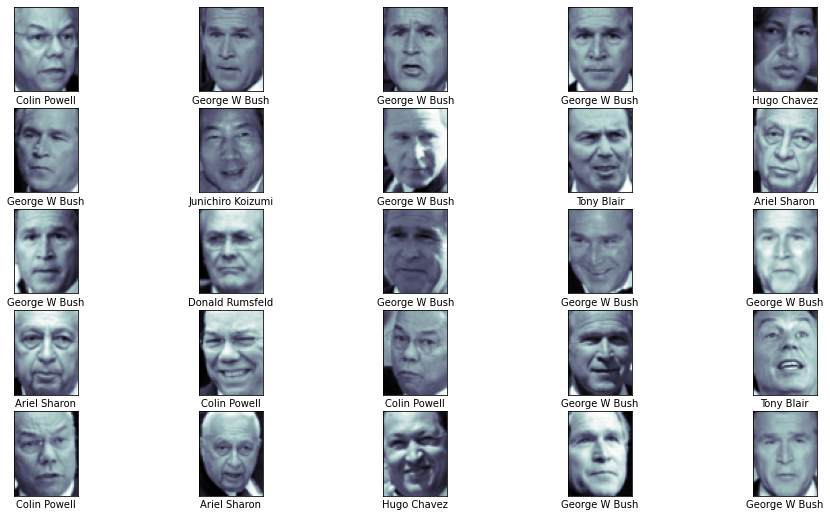

In [12]:
fig, ax = plt.subplots(5, 5, figsize = (16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

Para entrenar el modelo comprimiremos la información con el metodo de analisis de componentes principales de la libreria sklearn.

Con pipeline dejaremos establecido que primero aplicamos el comprimido, y luego utilizamos el modelo

In [17]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel="rbf", class_weight="balanced")
model = make_pipeline(pca, svc)

Divideremos el dataset en entrenamiento y testeo, luego utilizaremos una grilla de parametros para probar varios hiperperametros buscando la optimización

In [20]:
X_train, x_test, Y_train, y_test = train_test_split(faces.data, faces.target, random_state = 42)

In [22]:
param_grid = {
    "svc__C":[0.1, 1, 5, 10, 50],
    "svc__gamma":[0.0001, 0.0005, 0.001, 0.005, 0.01],
}

grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, Y_train)

Wall time: 1min 1s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.1, 1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]})

## Imprimimos los mejores parametros

In [23]:
grid.best_params_

{'svc__C': 10, 'svc__gamma': 0.001}

In [24]:
classifier = grid.best_estimator_
y_predcit = classifier.predict(x_test)

Text(0.5, 0.98, 'Predicciones de las imagenes')

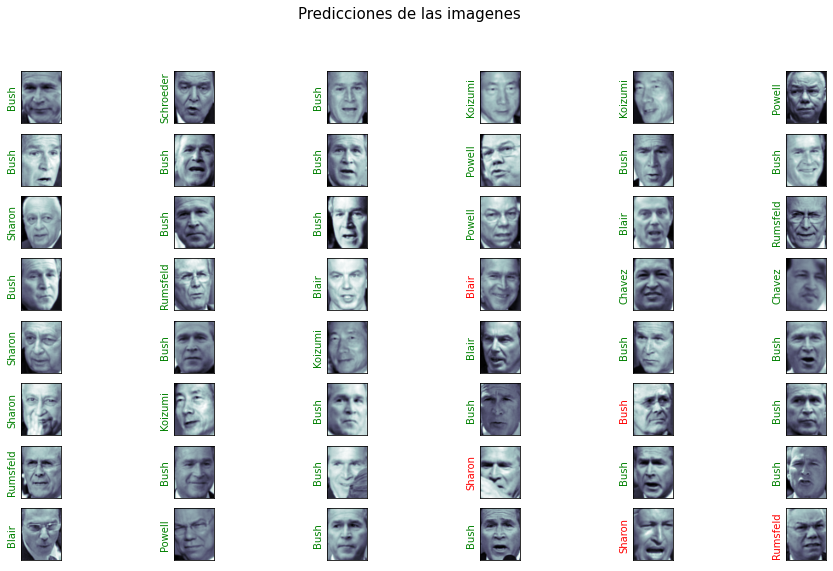

In [28]:
fig, ax = plt.subplots(8, 6, figsize = (16, 9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(x_test[i].reshape(62, 47), cmap="bone")
    ax_i.set(xticks = [], yticks = [])
    ax_i.set_ylabel(faces.target_names[y_predcit[i]].split()[-1],
                                      color = "green" if y_predcit[i] == y_test[i] else "red")
    
fig.suptitle("Predicciones de las imagenes", size = 15)

In [30]:
print(classification_report(y_test, y_predcit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



### Matriz de confusión de las predicciónes

Realizamos la matriz para visualizar la capacidad que tuvo el modelo para clasificar las distintas imagenes

<AxesSubplot:>

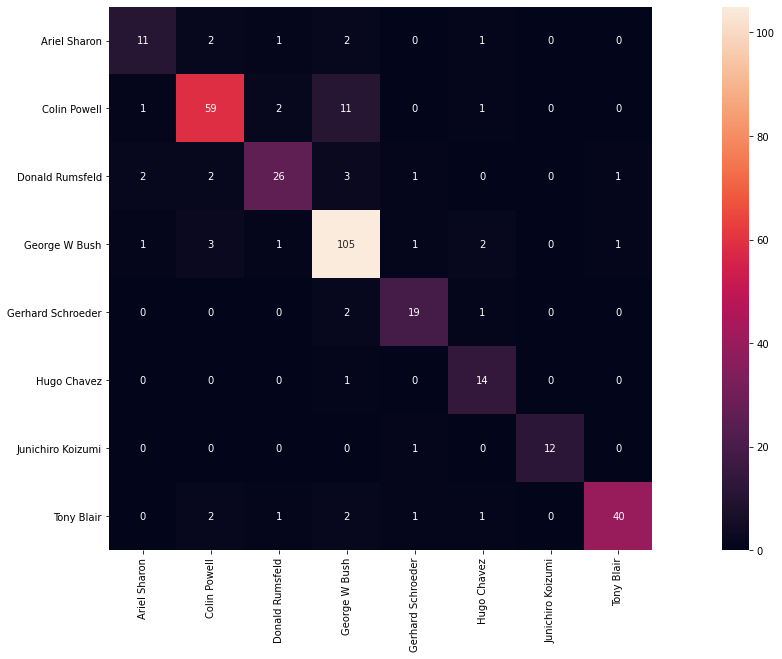

In [37]:
mat = confusion_matrix(y_test, y_predcit)

fig = plt.figure(figsize = (25, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
           xticklabels=faces.target_names, yticklabels=faces.target_names)